In [211]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# PROBLEM 1

### In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

### To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

#### A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

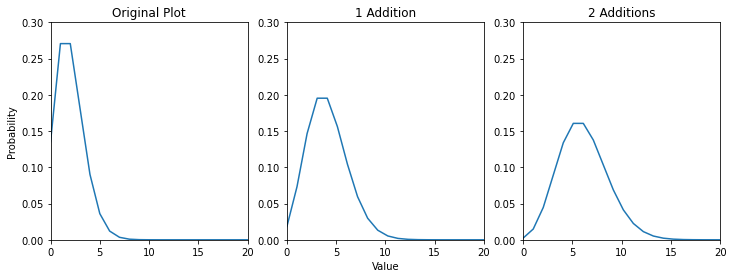

In [212]:
fig, axes = plt.subplots(nrows =1, ncols = 3, figsize = (12,4))

avgb = 2
x= range(0,21)
xx=np.linspace(0,41,41)
xxx = np.linspace(0,61,61)
a = stats.poisson.pmf(x, mu = avgb)
aa = np.convolve(a,a)
aaa = np.convolve(aa,a)


axes[0].plot(x,a)
axes[0].set_xlim(0,20)
axes[0].set_ylim(0,0.30)
axes[0].set_title('Original Plot')
axes[0].set_ylabel('Probability')

axes[1].plot(xx,aa)
axes[1].set_xlim(0,20)
axes[1].set_ylim(0,0.30)
axes[1].set_title('1 Addition')
axes[1].set_xlabel('Value')

axes[2].plot(xxx,aaa)
axes[2].set_xlim(0,20)
axes[2].set_ylim(0,0.30)
axes[2].set_title('2 Additions')
plt.show()

As you sum for more days using the convolution function, the poisson distrobution widens and becomes more guassian like.







#### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

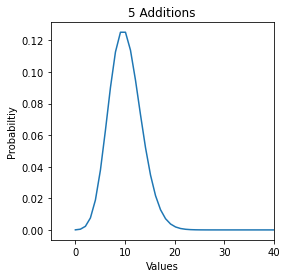

In [213]:
fig, axes = plt.subplots(nrows =1, ncols = 1, figsize = (4,4))

avgb = 2
x= range(0,21)
xx=np.linspace(0,41,41)
xxx = np.linspace(0,61,61)
x5 = np.linspace(0,101,101)
a = stats.poisson.pmf(x, mu = avgb)
aa = np.convolve(a,a)
aaa = np.convolve(aa,a)
a4 = np.convolve(aaa,a)
a5 = np.convolve(a4,a)
axes.plot(x5,a5)
axes.set_xlim(-5,40)
axes.set_title('5 Additions')
axes.set_ylabel('Probabiltiy')
axes.set_xlabel('Values')
plt.show()

The distrobution above has underwent 5 iterations of addition and the curve is approaching a gaussian shape. However, it is still a poisson distrobution. This can be seen by the long tail that extends only in the positive direction.







#### C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

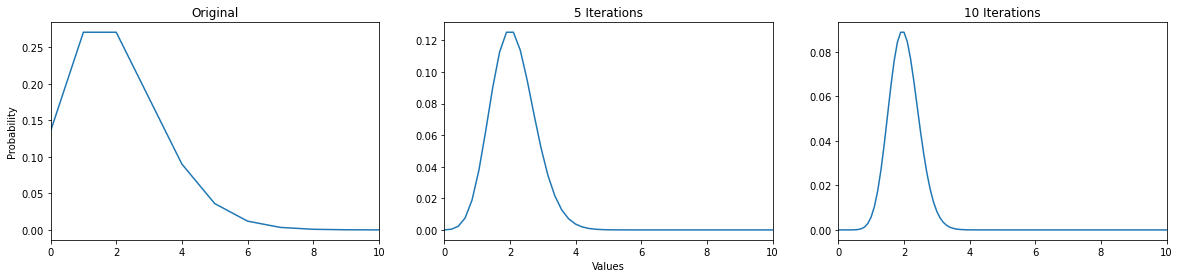

In [214]:
fig, axes = plt.subplots(nrows =1, ncols = 3, figsize = (20,4))

avgb = 2
x= range(0,21)
xx=np.linspace(0,21,41)
xxx = np.linspace(0,21,61)
a = stats.poisson.pmf(x, mu = avgb)
aa = np.convolve(a,a)
aaa = np.convolve(aa,a)
a4 = np.convolve(aaa,a)
a5 = np.convolve(a4,a)
x5 = np.linspace(0,21,101)

cc = stats.poisson.pmf(x, mu = avgb)
inst = cc
x10 = np.linspace(0,20,201)
k = 0
while k < 9:
    c = np.convolve(cc,inst)
    cc = c
    k = k+1

axes[0].plot(x,a)
axes[0].set_xlim(0,10)
axes[0].set_title('Original')
axes[0].set_ylabel('Probability')

axes[1].plot(x5,a5)
axes[1].set_xlim(0,10)
axes[1].set_title('5 Iterations')
axes[1].set_xlabel('Values')

axes[2].plot(x10,c)
axes[2].set_xlim(0,10)
axes[2].set_title('10 Iterations')
plt.show()

When averaging over multiple iterations, similar to the addition in part B), the plot approaches a gaussian curve. This is supported by the central limit theorem stating that a poisson distrobution will approach a gaussian curve with center at its mu value.







#### D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.

In [215]:
numdays = 2
value = 10

prob5sig = 1/3.5e6
det = stats.poisson.ppf(1-prob5sig/numdays, mu =2)
print('Minimum Value for 5 Sigma ' +str(det))
probability = (1- stats.poisson.cdf(value, mu = 2))*numdays
print('Probability for a Signal of '+str(value)+' to be caused by background '+str(probability))
sigma =-stats.norm.ppf(probability/numdays)
print('Sigma for a Signal of '+str(value)+' is '+str(sigma))

Minimum Value for 5 Sigma 13.0
Probability for a Signal of 10 to be caused by background 1.661644873696133e-05
Sigma for a Signal of 10 is 4.306091313409873


For a 5 day interval, a value of at least 13 is required to produce a 5sigma probability. Signal value of produces a sigma of 4.3. Not significant enough








# PROBLEM 2

### Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval

#### A) Show how the distribution changes as you average over more observing intervals.

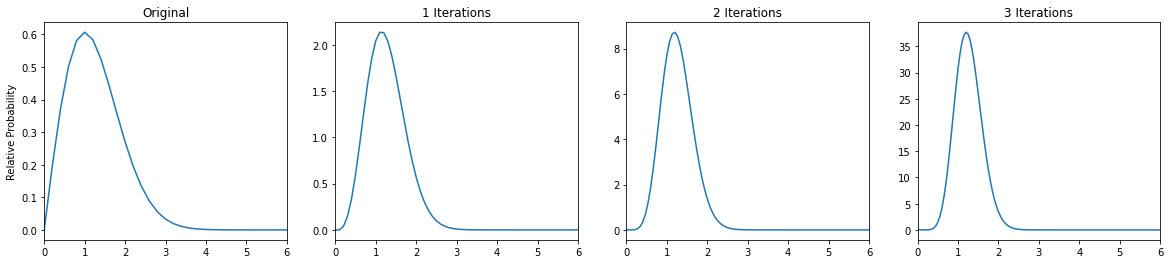

In [216]:
fig, axes = plt.subplots(nrows =1, ncols = 4, figsize = (20,4))

i= np.linspace(0,20,101)
ii=np.linspace(0,20,201)
iii = np.linspace(0,20,301)
iiii = np.linspace(0,20,401)
avgb = 0

ray = stats.rayleigh.pdf(i, loc = avgb)
ray2 = np.convolve(ray,ray, mode = 'full')
ray3 = np.convolve(ray2,ray, mode = 'full')
ray4 = np.convolve(ray3, ray, mode = 'full')

axes[0].plot(i,ray)
axes[0].set_xlim(0,6)
axes[0].set_title('Original')
axes[0].set_ylabel('Relative Probability')

axes[1].plot(ii,ray2)
axes[1].set_xlim(0,6)
axes[1].set_title('1 Iterations')

axes[2].plot(iii,ray3)
axes[2].set_xlim(0,6)
axes[2].set_title('2 Iterations')

axes[3].plot(iiii,ray4)
axes[3].set_xlim(0,6)
axes[3].set_title('3 Iterations')
#axes[3].set_yscale('log')
plt.show()

As you average over more intervals of collected data, the rayleigh curve approaches a gaussian shape. The width is also narrowed.








#### B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

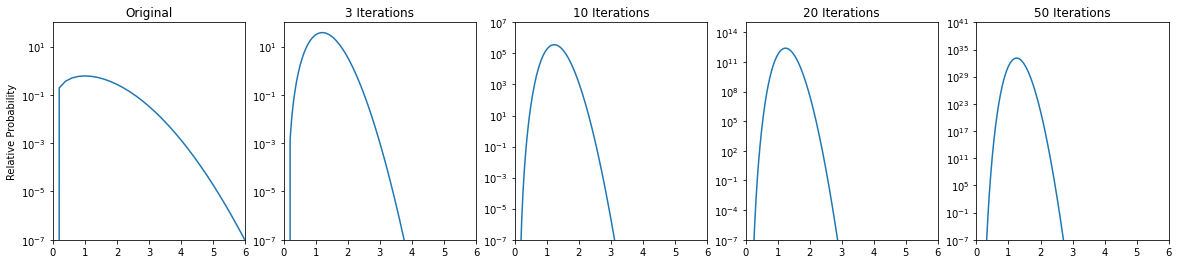

In [217]:
avgb = 0
i= np.linspace(0,20,101)
cc = stats.rayleigh.pdf(i, loc = avgb)
inst = cc
i10 = np.linspace(0,20,1001)
k = 0
while k < 9:
    c = np.convolve(cc,inst)
    cc = c
    k = k+1

fig, axes = plt.subplots(nrows =1, ncols = 5, figsize = (20,4))


axes[0].plot(i,ray)
axes[0].set_xlim(0,6)
axes[0].set_title('Original')
axes[0].set_ylabel('Relative Probability')
axes[0].set_yscale('log')
axes[0].set_ylim(10e-8,100)

axes[1].plot(iiii,ray4)
axes[1].set_xlim(0,6)
axes[1].set_title('3 Iterations')
axes[1].set_yscale('log')
axes[1].set_ylim(10e-8,100)


axes[2].plot(i10,c)
axes[2].set_xlim(0,6)
axes[2].set_title('10 Iterations')
axes[2].set_yscale('log')
axes[2].set_ylim(10e-8,10e6)

avgb = 0
i= np.linspace(0,20,101)
cc = stats.rayleigh.pdf(i, loc = avgb)
inst = cc
i20 = np.linspace(0,20,2001)
k = 0
while k < 19:
    c = np.convolve(cc,inst)
    cc = c
    k = k+1

axes[3].plot(i20,c)
axes[3].set_xlim(0,6)
axes[3].set_title('20 Iterations')
axes[3].set_yscale('log')
axes[3].set_ylim(10e-8,10e14)    


avgb = 0
i= np.linspace(0,20,101)
cc = stats.rayleigh.pdf(i, loc = avgb)
inst = cc
i50 = np.linspace(0,20,5001)
k = 0
while k < 49:
    c = np.convolve(cc,inst)
    cc = c
    k = k+1
    
axes[4].plot(i50,c)
axes[4].set_xlim(0,6)
axes[4].set_title('50 Iterations')
axes[4].set_yscale('log')
axes[4].set_ylim(10e-8,10e40)    
plt.show()



The shape approaches gaussian with increased iterations. The plot can be assumed gaussian on any number of iterations if the y-range is narrow enough. In these plots, it is shown that only after 50 iteratiosn does this set appear to be gaussian at a y-range of 40 orders of magnitude.






# PROBLEM 3

### "The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

### We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image."

## Version 1

### You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

#### A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In [218]:
Y  = 10.61
prob = stats.norm.cdf(Y,loc = 0, scale = 2)
sigma  = stats.norm.ppf(prob)
print('Sigma of ' +str(Y)+' is '+str(sigma))





Sigma of 10.61 is 5.304999999859879


Yes, a signal strength of 10.61 does constitute significance by a sigma value > 5.








## Version 2

### You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

#### B) f you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

Question: What is the PDF of the background for a 10k pixel gaussian distrobution

Each pixel has its own gaussian pdf, and this is now increased by a factor of 10k in order to evaluate each of the 10k pixels for this signal. This produces a sum of 10,000 gaussians curves. This increases the occurances of low probabilty signal strengths. This lowers sigma values for equivalent signal strengths






#### C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection

In [219]:
Y = 10.61
nupix = 10000

probability = (stats.norm.cdf(Y, loc = 0, scale = 2))/1000
sigma = -stats.norm.ppf(probability)
print('Sigma of '+str(Y) +' is '+ str(sigma))

Sigma of 10.61 is 3.090232322899323


No, not significant. Sigma is < 5





# PROBLEM 4

### The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

#### A) Calculate the signal required for a 5-sigma detection in Version 1

In [220]:
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
print('Signal Strength Required for 5-Sigma is '+str(det1))

Signal Strength Required for 5-Sigma is 10.001262869860762


#### B) Calculate the signal required for a 5-sigma detection in Version 2 

In [221]:
prob5sig = 1/3.5e6
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print('Signal Strength Required for 5-Sigma is '+str(det2))

Signal Strength Required for 5-Sigma is 13.102052788103173


#### C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [222]:
diff = det2/det1-1
print('Difference in detection factor between both trials is ' +str(diff))

Difference in detection factor between both trials is 0.3100398378275584


Using parts A and B, the signal difference required is ~31%. This increase can be considered low given a penalty factor of 10,000.Looking at probability distrobutions, the edges of plots change very little, leaving similar probabilites for even multiple order of magnitude changes.






#### D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [223]:
Y = 10.61
nupix = 1
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
r = (det2/det1 - 1)

nupix = 10
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
rr = (det2/det1 - 1)
print('Difference between 10e0 and 10e1 is ' + str(rr-r))


nupix = 100
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
r = (det2/det1 - 1)

nupix = 1000
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
rr = (det2/det1 - 1)
print('Difference between 10e2 and 10e3 is ' + str(rr-r))


nupix = 10e7
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
r = (det2/det1 - 1)

nupix = 10e8
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
rr = (det2/det1 - 1)
print('Difference between 10e8 and 10e9 is ' + str(rr-r))
 

Difference between 10e0 and 10e1 is 0.08536668760216526
Difference between 10e2 and 10e3 is 0.07463155014385725
Difference between 10e8 and 10e9 is 0.05354593928709739


Changes about 5-10% per order of magnitude. This step value decreases as the trial factor increases.